### Naive Bayes Algorithm, Support Vector Machine Algrothim, and Random Forest Algrothim:
### Building a Spam Detector

#### What is Naive Bayes Algorithm ?

Naive Bayes are probabilistic models that apply "Bayes Theorem" to make classification on a set of data assuming that there is strong independence between features. This independency means that the existence of a certain feature is unrelated to the existence of other features. For example, grape has a purple color, round shape and sweet taste. Naive Bayes would consider each feature of the grape to contribute indepently to the probability of classfying the fruit to grape regardless of the correlations between these three features. Due to the ease of implementation, Naive Bayes provides very good performing models in practice.

#### How Naive Bayes Works ?

In [3]:
# importing needed libraries to display the Naive Bayes rule
import requests 
from PIL import Image
from io import BytesIO
%matplotlib inline
response = requests.get("https://miro.medium.com/max/998/1*Lt8E08oxEnnRegLbNBzNAg.png")
image = Image.open(BytesIO(response.content))

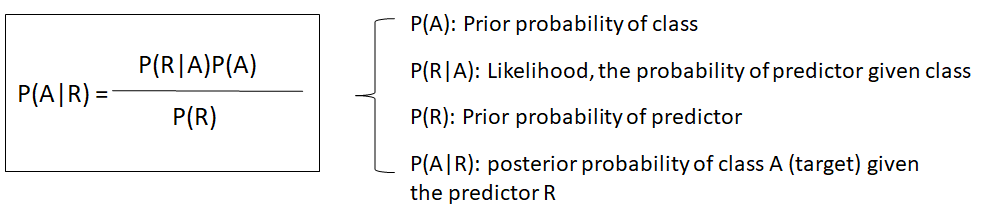

In [4]:
#displaying the Naive Bayes rule
image

To find the posterior probability of a certain event "A", it uses the probabilities of prior events. Refer to the above formela for the mathmatical representation.

#### What are the advantages and disadvantages of Naive Bayes ?

Advantages:

1. When assumption of independent predictors holds true, a Naive Bayes classifier performs better as compared to other models.

2. Naive Bayes requires a small amount of training data to estimate the test data. So, the training period is less.

3. Naive Bayes is also easy to implement.

4. The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one dimensional distribution. This helps with problems derived from the curse of dimensionality and improve the performance.

Disadvantages:

1. Main imitation of Naive Bayes is the assumption of independent predictors. Naive Bayes implicitly assumes that all the attributes are mutually independent. In real life, it is almost impossible that we get a set of predictors which are completely independent.

2. If categorical variable has a category in test data set, which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as Zero Frequency. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.

3. Although they are pretty good classifiers, naive bayes are know to be poor estimators. So the probability that outputs from it shouldn’t be taken very seriously.


#### What is Support Vector Machine Algorithm (SVM) ?

It's an algrothim that is used in supervised learning , meaning training data is labled, to find the optimal seprating line between different classes of data. The objective of SVM is to find the plane with the maximum margin or distance between data points of different classes to provide more space for future data points to be classfied correctly. 

#### What are the advantages and disadvantages of SVM ?

Advantages:

1. When there is a clear margin of separation between different classes, SVM works relatively well.
2. In high dimensional spaces, SVM works more effectively.
3. When the number of dimensions is greater than the number of samples, SVM is more effective.
4. SVM is memory efficient algorithim. 

Disadvantages:

1. For large number of data points, SVM is not suitable.
2. When the data set has more noise ( ex: target classes are overlapping), SVM will not perform very well.
3. When the number of features for each data point exceeds the number of training data points, the SVM will not perform well.

#### Introduction : What is Random Forest Algorithm ?

The Random Forest Model is based on the idea of Decision Trees; it combines a group of decision trees that each is trained using different set of features to split the data set. At the final step, the final predictions are then decided by taking the average predictions of all decision trees. 


#### What are the advantages and disadvantages of Random Forest ?

Advantages:

1. Using bagging algorithm and ensembling learning teqchnique, Random Forest produces as many trees from the data set and then combines the final output based on all these trees. Thus, it reduces the problems of overfitting and variance in a way that improves the accuracy of its results.
2. Classification and regression problems can be solved using Random Forest Algorthim. 
3. Categorical and continuous variables works well with Random Forest.
4. Using Random Forest, missing values can be handled automatically.

Disadvantages:

1. Random Forest can be a complex algorthim as it creates many trees,compared to Decision Tree, and combines their outputs in its final result. Using Sklearn Library, it creates 100 trees by defult. 
2. Random Forest can consume a long time in training data, when it's compared to Decision Trees, because it generates many trees and makes the final decision based on average of all the trees.

### Spam Detector 

Spam detection is one of the vital features that is implied in any email service provider. In this project, I will use the Naive Bayes and Support Vector Machine to train provided data to classfiy emails with or without spam and compare their performance. 

### Project Overview

The project steps will be as the following : 

1. Exploring the dataset.
2. Introduction to Bag of Words (BoW) and Sci-kit implementation.
3. Splitting Dataset in training and testing set.
4. Applying BoW to process the dataset.
5. Naive Bayes Implementation with sci-kit learn.
6. SVM Implementation with sci-kit learn.
7. Random Forest Implementation with sci-kit learn.
8. Models evaluation.
9. Conclusion.

##### Exploring the Data Set

The data set that will be used for this project is imported from Kaggle Website(online platform for data scientists and machine learners).

The data set link : https://www.kaggle.com/balakishan77/spam-or-ham-email-classification

In [1]:
# pandas library is imported (pandas package is used for exploring and cleaning data sets)
import pandas as pd
# openning the data set file
df = pd.read_csv("spamham.csv")

In [2]:
# displaying the first five rows 
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


As show in the previous table, the column 'text' is for the emails text, and the 'spam' column has values of 1 and 0 to classify emails. 1 for spam emails and 0 for non spam emails.

It can be also noticed that the word 'Subject:' is repeated in each email text. They need to be removed to avoid altering the analysis results.

In [3]:
# using the lampda function to loop in all emails and remove 'Subject:'
df['text'] = df['text'].apply(lambda x:x.replace('Subject:',''))


In [4]:
# displaying the data set to make sure the email fix worked well 
df.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,"do not have money , get software cds from her...",1


##### Introduction to Bag of Words (BoW) and Sci-kit implementation

The project data set has 5739 rows. The model used will only accept numerical data as input,so I should process the emails text. Thus, the Bag of Word is an essential algrothim in this project. This algrothim takes the text and count the frequency of the words in the given text. BoW treats each word indepently and ignores the order of the word. I can convert the emails text into a matrix, with each email as a row and each word(token) is a column, and the corresponding (row,column) values beign the frequency of occurrence of each word or token in that emails data set. 

To apply the BoW conpcet, I will use the sklearns CountVectorizer method that does the following:

1. It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
2. It counts the occurrence of each of those tokens.
3. It automatically converts all tokenized words to their lower case form so that it does not treat words like ‘He’ and ‘he’ differently.
4. It also ignores all punctuation so that words followed by a punctuation mark (for example: ‘hello!’) are not treated differently than the same words not prefixed or suffixed by a punctuation mark (for example: ‘hello’).
5. The third parameter to take note of is the stop_words parameter. Stop words refer to the most commonly used words in a language. They include words like 'am', 'an', 'and', 'the' etc. By setting this parameter value to english, CountVectorizer will automatically ignore all words(from input text) that are found in the built in list of english stop words in scikit-learn.

##### Splitting Dataset in Training and Testing Sets

I want to split data so it has the following structure:
1. X_train is my training data for the 'text' column.
2. y_train is my training data for the 'label' column.
3. X_test is my testing data for the 'text' column.
4. y_test is my testing data for the 'label' column.

Note: I will print out the number of rows I have in each training and testing data set.

In [5]:
# splitting my data into training and testing sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df['text'],df['spam'], random_state = 42)

print('Number of rows in the total data set {}'.format(df.shape[0]))

print('Number of rows in the training set {}'.format(x_train.shape[0]))

print('Number of rows in the testing set {}'.format(x_test.shape[0]))

Number of rows in the total data set 5728
Number of rows in the training set 4296
Number of rows in the testing set 1432


##### Applying BoW to Process the Dataset

After splitting the data set into training and testing sets, I will use the CountVectorizer() to 
build a matrix dispalying all frecuencies for emails words by following these steps:

1. I will fit (x_train), the training data, into the CountVectorizer() and return the resulted matrix.

2. I will transfom the (x_test), the testing data, to return the matrix.

Note : X_train is the training data for the "Text" column in the dataset, and I will use it to train my model.
X_test is the testing data for also the same column "Text", and I will use it (after beign transformed into a matrix) to make predictions on. Later, I will compare the results of these predictions with Y_test , which corresponds to the "Spam" classifcation column. 


In [6]:
from sklearn.feature_extraction.text import CountVectorizer

# preparing the CountVectoizer
count_vector = CountVectorizer()

# fitting and transforming the x_train into the matrix model
training_data = count_vector.fit_transform(x_train)

# transforming the testing_data to a matrix 
testing_data = count_vector.transform(x_test)

##### Naive Bayes Implementation with Sci-Kit Learn

I will be use the multinomial Naive Bayes implementation. This classifier is used for classificying data with discrete features (such as in my project case, word counts for text classification). This model takes the count of words as input. While the normal,Gaussian,distribuation is used in the case of continuous data as it assumes that the input data has a noraml, Gaussian, distribuation.  

In [32]:
from sklearn.naive_bayes import MultinomialNB

# preparing MultinomiaNB model 
n_bayes = MultinomialNB()
# fitting the previous trained data with y_train into the model
n_bayes.fit(training_data,y_train)
end = time.time()

In [8]:
# making predictions using the previous prepared testing_data
predictions_nbayes = n_bayes.predict(testing_data)

##### Support Vector Machine Implementation with Sci-Kit Learn

In [9]:
from sklearn.svm import SVC

# preparing SVM model
svm_model = SVC()
# fitting the previous trained data with y_train into the model
svm_model.fit(training_data, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
# making predictions using the previous prepared testing_data
predictions_svm = svm_model.predict(testing_data)

##### Random Forest Implementation with Sci-Kit Learn

In [27]:
# importing the Random Forest Model
from sklearn.ensemble import RandomForestClassifier
# preparing the random forest model
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
# fitting the random forest model
random_forest.fit(training_data,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
# making predictions using the previous prepared testing_data
predictions_rf = random_forest.predict(testing_data)

##### Models evaluation

After fitting my model and making predictions, I need know how are my two models are preforming. 
Therefore, I will make some tests in my trained model to find the accuracys score, precision and sensitivity:

1. Accuracy Score: it measures how often the clasifier model is making correct predictions on the data set. It's calculated as the number of correct predictions divided by the total number of predictions (it's the number of the test data points).

2. Precision : it calculates the proprtion of emails that were classified as spam by us, actually were spam. 

Precision = True Positives (words classfied as spam , and which are actually spam) / ( True Positives  + False Positives ) (all words classified as spam, whether they were classfied correctly or uncorrectly). 

3. Sensitivity (Recall) : it finds the proportion of emails that are actually were spam classified by us as spam. 

Sensitivity = True Positives (words classfied as spam , and which are actually spam) / (True Positives + False Negatives)(all words that are actually spam). 

4. F1 : is a measure that used to find the best balance between precision and sensitivity scores and in the case of high number of large negatives.


##### Evaluation of Naive Bayes Algorithim

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy score is:",format(accuracy_score(y_test,predictions_nbayes)))

print("Precision score is:",format(precision_score(y_test,predictions_nbayes)))

print("Sensitivity score is:",format(recall_score(y_test,predictions_nbayes)))

print("F1 Score is:",format(f1_score(y_test,predictions_nbayes)))

Accuracy score is: 0.9874301675977654
Precision score is: 0.9782016348773842
Sensitivity score is: 0.9728997289972899
F1 Score is: 0.9755434782608696


##### Conclusion 

Naive Bayes algorithim is performing very well on all the four evaluations matrix. 

##### Evaluation of Support Vector Machine Alogrithim

In [12]:
print("Accuracy score is:",format(accuracy_score(y_test,predictions_svm)))

print("Precision score is:",format(precision_score(y_test,predictions_svm)))

print("Sensitivity score is:",format(recall_score(y_test,predictions_svm)))

print("F1 Score is:",format(f1_score(y_test,predictions_svm)))

Accuracy score is: 0.9392458100558659
Precision score is: 0.9862068965517241
Sensitivity score is: 0.7750677506775068
F1 Score is: 0.8679817905918058


SVM algorithim is performing somehow good, but not out performing like Naive Bayes. I will use GridSearchCV library to find the optiomal model.

In [13]:
# importing GridSearchCv library
from sklearn.model_selection import GridSearchCV

# paramters to find its values that would make SVM perform better
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# bulding SVC model
svr = SVC()
clf = GridSearchCV(svr, parameters)
# fitting data
clf.fit(training_data, y_train)
# displaying the best parameters values 
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [14]:
# re-bulding SVM model using the found paramters
svm_model = SVC(C = 10, kernel = "linear")
# fitting the previous trained data with y_train into the model
svm_model.fit(training_data, y_train)
# making predictions
predictions_svm = svm_model.predict(testing_data)

In [15]:
print("Accuracy score is:",format(accuracy_score(y_test,predictions_svm)))

print("Precision score is:",format(precision_score(y_test,predictions_svm)))

print("Sensitivity score is:",format(recall_score(y_test,predictions_svm)))

print("F1 Score is:",format(f1_score(y_test,predictions_svm)))

Accuracy score is: 0.9853351955307262
Precision score is: 0.9860335195530726
Sensitivity score is: 0.9566395663956639
F1 Score is: 0.9711141678129297


##### Conclusion 

After finding the best paramters for SVM, the model performance has imporved and become nearly the same as Naive Bayes.

##### Evaluation of Random Forest Alogrithim

In [29]:
print("Accuracy score is:",format(accuracy_score(y_test,predictions_rf)))

print("Precision score is:",format(precision_score(y_test,predictions_rf)))

print("Sensitivity score is:",format(recall_score(y_test,predictions_rf)))

print("F1 Score is:",format(f1_score(y_test,predictions_rf)))

Accuracy score is: 0.9581005586592178
Precision score is: 1.0
Sensitivity score is: 0.8373983739837398
F1 Score is: 0.911504424778761


##### Conclusion 

The Random Forest is performing well;however is not as good as the previous two models. 

##### Final Conclusion

After applying the three previous models and evaluating them, I can say that Naive Bayes is the best performing then come SVM and finally Random Forest in detecting emails with spam. 

##### Refrecnes 

https://towardsdatascience.com/naive-bayes-intuition-and-implementation-ac328f9c9718

https://en.wikipedia.org/wiki/Naive_Bayes_classifiers

http://theprofessionalspoint.blogspot.com/2019/03/advantages-and-disadvantages-of-naive.html

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47

https://medium.com/@dhiraj8899/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107

https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76

http://theprofessionalspoint.blogspot.com/2019/02/advantages-and-disadvantages-of-random.html
